In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import signal

In [2]:
acc = np.genfromtxt('MDSAGT_V1 2022-05-23 10-48-50/Beschleunigung ohne g 2022-05-24 13-38-32/raw Data.csv', delimiter=',', skip_header=True)

In [3]:
print(acc.shape)

(499, 5)


In [4]:
print(acc[1,:])

[ 0.02671167 -0.17288258  0.18649475 -0.09106863  0.27011511]


In [6]:
a = math.sqrt(acc[1,1]**2+acc[1,2]**2+acc[1,3]**2)
print(a)

0.2701151111709296


In [7]:
np.save('MDSAGT_V1 2022-05-23 10-48-50/Beschleunigung ohne g 2022-05-24 13-38-32/raw Data.npy', acc)

In [8]:
acc = np.load('MDSAGT_V1 2022-05-23 10-48-50/Beschleunigung ohne g 2022-05-24 13-38-32/raw Data.npy')

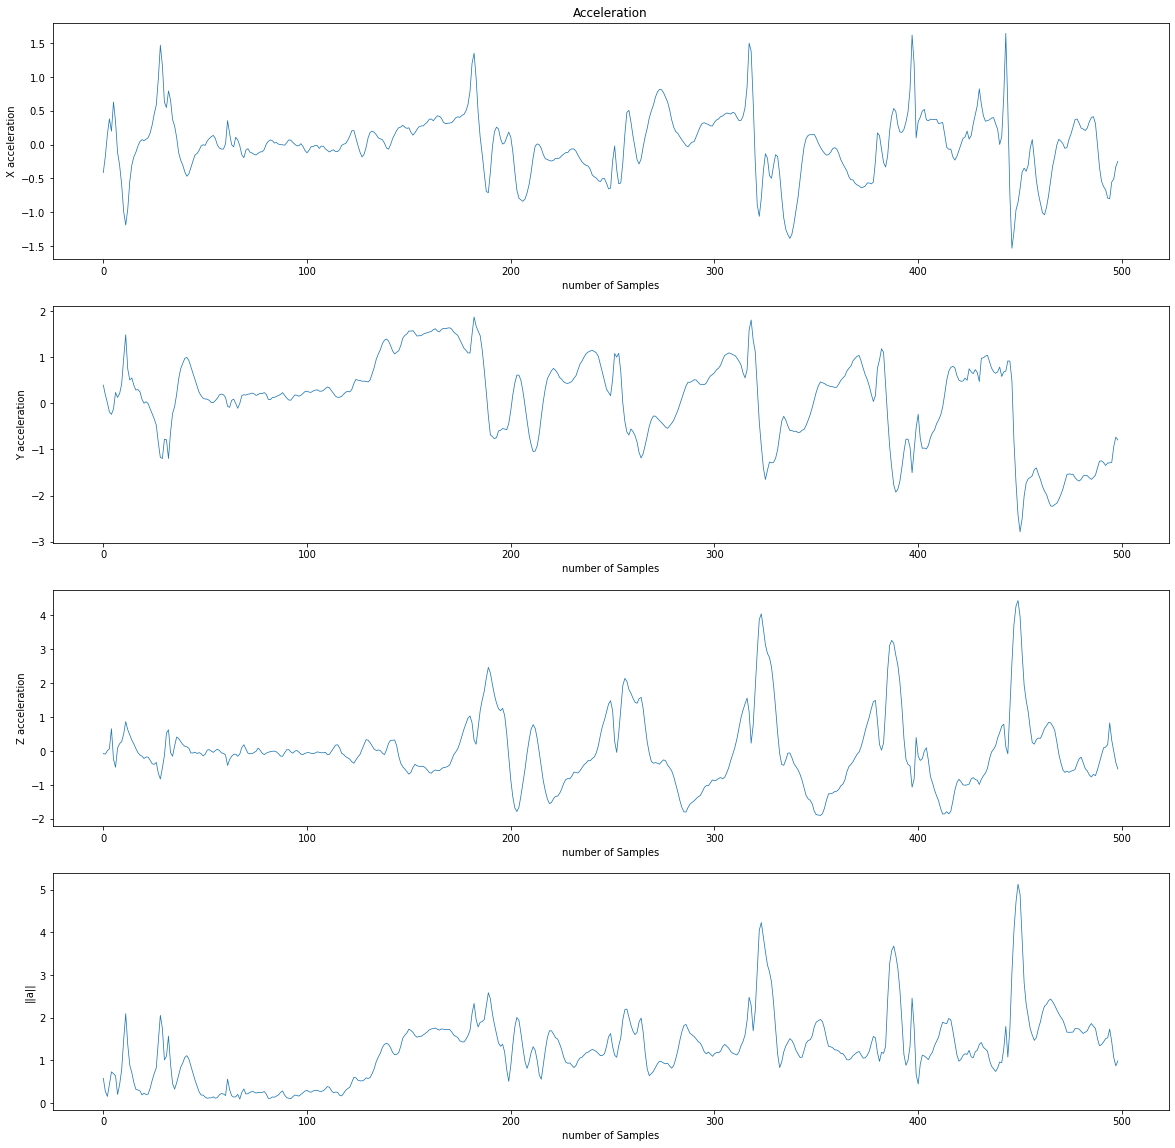

In [14]:
plt.figure(figsize=(20, 20))
plt.subplot(4, 1, 1)
plt.plot(acc[:,1], '-', linewidth=0.75)
plt.title('Acceleration')
plt.xlabel('number of Samples')
plt.ylabel('X acceleration')

plt.subplot(4, 1, 2)
plt.plot(acc[:,2], '-', linewidth=0.75)
plt.xlabel('number of Samples')
plt.ylabel('Y acceleration')

plt.subplot(4, 1, 3)
plt.plot(acc[:,3], '-', linewidth=0.75)
plt.xlabel('number of Samples')
plt.ylabel('Z acceleration')

plt.subplot(4, 1, 4)
plt.plot(acc[:,4], '-', linewidth=0.75)
plt.xlabel('number of Samples')
plt.ylabel('||a||')

plt.show()

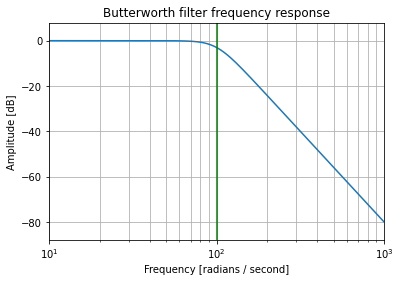

In [16]:
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

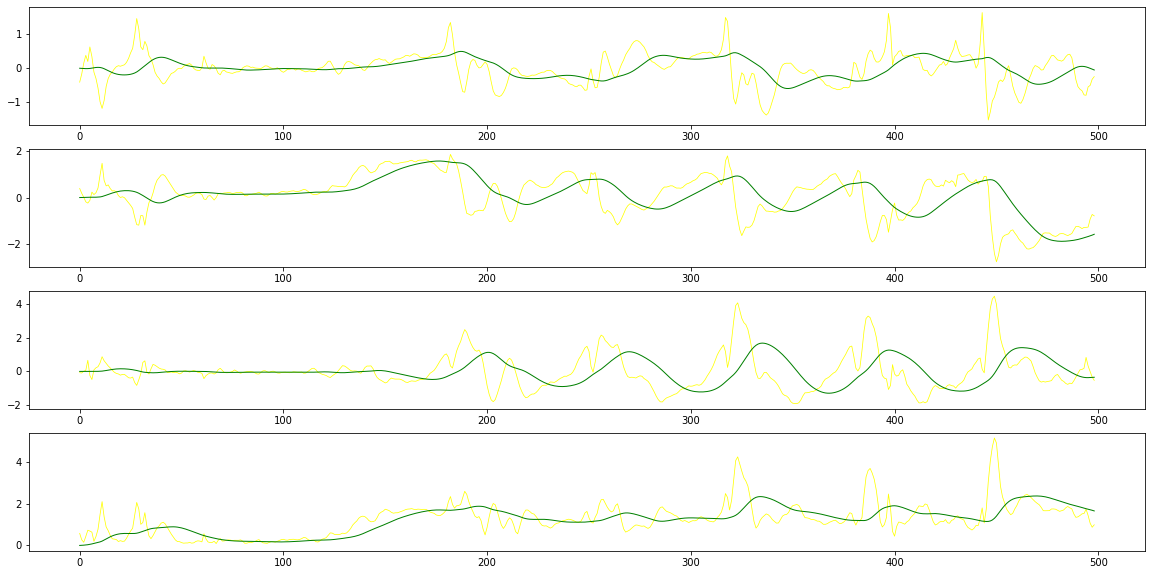

In [38]:
sos = signal.butter(2, 100, fs=5879, output='sos')
filtered_x = signal.sosfilt(sos, acc[:,1])
filtered_y = signal.sosfilt(sos, acc[:,2])
filtered_z = signal.sosfilt(sos, acc[:,3])
filtered_a = signal.sosfilt(sos, acc[:,4])

plt.figure(figsize=(20, 10))
plt.title('Butterworth Acceleration')
plt.subplot(4, 1, 1)
plt.plot(acc[:,1], color='yellow', linewidth=0.75)
plt.plot(filtered_x, color='green', linewidth=1.0)

plt.subplot(4, 1, 2)
plt.plot(acc[:,2], color='yellow', linewidth=0.75)
plt.plot(filtered_y, color='green', linewidth=1.0)

plt.subplot(4, 1, 3)
plt.plot(acc[:,3], color='yellow', linewidth=0.75)
plt.plot(filtered_z, color='green', linewidth=1.0)

plt.subplot(4, 1, 4)
plt.plot(acc[:,4], color='yellow', linewidth=0.75)
plt.plot(filtered_a, color='green', linewidth=1.0)

plt.show()

In [39]:
#filtered_acc = np.concatenate((acc[:,3], filtered_x, filtered_y, filtered_z), axis=1)
acc_shape = acc.shape
print(acc_shape)
an_array = np.zeros((acc_shape[0],2))
an_array[:,0] = acc[:,0]
an_array[:,1] = filtered_a
print(an_array.shape)

(499, 5)
(499, 2)


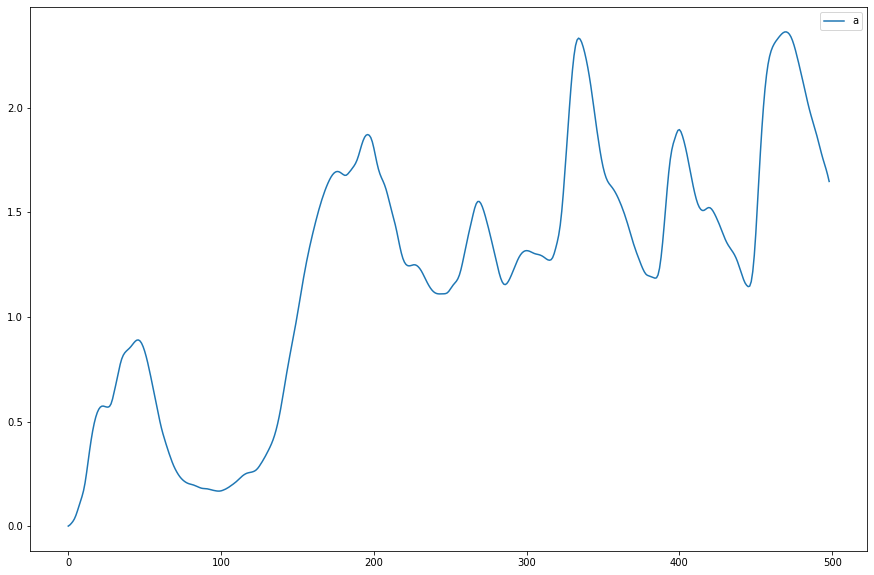

In [40]:
plt.figure(figsize=(15, 10))

plt.plot(an_array[:,1], label='a')

plt.legend()
plt.show()

In [41]:
# find peaks in absolute acceleration -> resulting in steps
a_peaks = signal.find_peaks(an_array[:,1])
steps = a_peaks[0].shape

print('Peaks in ||a||:', steps[0])
print('Peak equals Step, therefore', steps[0], 'Steps.')

Peaks in ||a||: 11
Peak equals Step, therefore 11 Steps.
